In [24]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from scipy.stats import pearsonr
from numpy import mean
from numpy import absolute
from numpy import sqrt

import statsmodels.api as sm
import statsmodels.formula.api as smf



In [8]:
bike = pd.read_csv("Bike Sharing Dataset.csv", usecols=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
bike.info()
bike.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   hr          17379 non-null  int64  
 2   workingday  17379 non-null  object 
 3   weathersit  17379 non-null  object 
 4   temp        17379 non-null  float64
 5   cnt         17379 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 814.8+ KB


,season,hr,workingday,weathersit,temp,cnt
0,spring,0,no,clear,0.24,16
1,spring,1,no,clear,0.22,40
2,spring,2,no,clear,0.22,32
3,spring,3,no,clear,0.24,13
4,spring,4,no,clear,0.24,1


In [9]:
bike.info()
print(bike.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   hr          17379 non-null  int64  
 2   workingday  17379 non-null  object 
 3   weathersit  17379 non-null  object 
 4   temp        17379 non-null  float64
 5   cnt         17379 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 814.8+ KB
season        0
hr            0
workingday    0
weathersit    0
temp          0
cnt           0
dtype: int64


In [12]:
# Start of Blaine's code for linear regression
bike['workingday'] = bike.workingday.factorize()[0]
bike['weathersit'] = bike.weathersit.factorize()[0]
bike['season'] = bike.season.factorize()[0]
bike['mnth'] = bike.mnth.factorize()[0]
bike['weekday'] = bike.weekday.factorize()[0]
bike['holiday'] = bike.holiday.factorize()[0]


est = smf.ols('cnt ~ hr + workingday + temp', bike).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     2259.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:37:58   Log-Likelihood:            -1.1218e+05
No. Observations:               17379   AIC:                         2.244e+05
Df Residuals:                   17375   BIC:                         2.244e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -84.6416      3.906    -21.669      0.000     -92.298     -76.985
hr              9.0494      0.170     53.100      0.000       8.715       9.383
workingday2     3.7938      2.512      1.511      0.131      -1.129       8.717
temp          336.0729      6.129     54.834      0.000     324.060     348.086
==============================================================================
Omnibus:                     3951.373   Durbin-Watson:                   0.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8470.361
Skew:                           1.324   Prob(JB):                         0.00
Kurtosis:                       5.164   Cond. No.                         78.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
corr_matrix = bike.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [ ]:
plt.scatter(bike['windspeed'], bike['cnt'], color='red')
plt.title('windspeed vs cnt')
plt.xlabel('windspeed')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike['atemp'], bike['cnt'], color='red')
plt.title('atemp vs cnt')
plt.xlabel('atemp')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike['temp'], bike['cnt'], color='red')
plt.title('temp vs cnt')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike['hr'], bike['cnt'], color='red')
plt.title('hr vs cnt')
plt.xlabel('hr')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike['season'], bike['cnt'], color='red')
plt.title('season vs cnt')
plt.xlabel('season')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike['weekday'], bike['cnt'], color='red')
plt.title('weekday vs cnt')
plt.xlabel('weekday')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

In [ ]:
x = bike[['windspeed','hr','temp','season','weekday','workingday','weathersit']]
y = bike['cnt']

cv = KFold(n_splits=50, shuffle=True)

model = LinearRegression()

scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=-1)
mean(absolute(scores))

In [ ]:
x = bike[['windspeed','hr','temp','season','weekday','workingday','weathersit','casual']]
y = bike['cnt']

cv = KFold(n_splits=50, shuffle=True)

model = LinearRegression()

scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=-1)
mean(absolute(scores))

In [5]:
# Preprocess Data (encode categorical values)

# import data

bike_df = pd.read_csv('Bike Sharing Dataset.csv', usecols=[1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 10, 11, 12, 13, 14 , 15, 16])

print("======= Datatypes =======")
bike_df.dtypes



======= Datatypes =======


dteday         object
season         object
yr              int64
mnth           object
hr              int64
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
bike_df.head()

cat_df = bike_df.select_dtypes(include=['object']).copy()

cat_df.head()

,dteday,season,mnth,holiday,weekday,workingday,weathersit
0,1/01/2011,spring,january,no,saturday,no,clear
1,1/01/2011,spring,january,no,saturday,no,clear
2,1/01/2011,spring,january,no,saturday,no,clear
3,1/01/2011,spring,january,no,saturday,no,clear
4,1/01/2011,spring,january,no,saturday,no,clear


In [10]:
cat_df["weathersit"] = cat_df["weathersit"].astype('category')
cat_df["season"] = cat_df["season"].astype('category')
cat_df["mnth"] = cat_df["mnth"].astype('category')
cat_df['weekday'] = cat_df["weekday"].astype('category')

cat_df.dtypes

dteday              object
season            category
mnth              category
holiday             object
weekday           category
workingday          object
weathersit        category
weathersit_cat        int8
season_cat            int8
mnth_cat              int8
weekday_cat           int8
dtype: object

In [20]:
cat_df["weathersit_cat"] = cat_df["weathersit"].cat.codes
cat_df["season_cat"] = cat_df["season"].cat.codes
cat_df["mnth_cat"] = cat_df["mnth"].cat.codes
cat_df['weekday_cat'] = cat_df["weekday"].cat.codes

cat_df.head()

,dteday,season,mnth,weekday,weathersit,weathersit_cat,season_cat,mnth_cat,weekday_cat,holiday_no,holiday_yes,workingday_no,workingday_yes
0,1/01/2011,spring,january,saturday,clear,0,1,4,2,1,0,1,0
1,1/01/2011,spring,january,saturday,clear,0,1,4,2,1,0,1,0
2,1/01/2011,spring,january,saturday,clear,0,1,4,2,1,0,1,0
3,1/01/2011,spring,january,saturday,clear,0,1,4,2,1,0,1,0
4,1/01/2011,spring,january,saturday,clear,0,1,4,2,1,0,1,0


In [22]:
# when you run this script for the first time, make sure you run this line of code too.
#cat_df = pd.get_dummies(cat_df, columns=['holiday', 'workingday'])
cat_df['holiday_no'] = cat_df['holiday_no'].astype(int)
cat_df['holiday_yes'] = cat_df['holiday_yes'].astype(int)
cat_df['workingday_no'] = cat_df['workingday_no'].astype(int)
cat_df['workingday_yes'] = cat_df['workingday_no'].astype(int)

cat_df.head()


,dteday,season,mnth,weekday,weathersit,weathersit_cat,season_cat,mnth_cat,weekday_cat,holiday_no,holiday_yes,workingday_no,workingday_yes
0,1/01/2011,spring,january,saturday,clear,0,1,4,2,1,0,1,1
1,1/01/2011,spring,january,saturday,clear,0,1,4,2,1,0,1,1
2,1/01/2011,spring,january,saturday,clear,0,1,4,2,1,0,1,1
3,1/01/2011,spring,january,saturday,clear,0,1,4,2,1,0,1,1
4,1/01/2011,spring,january,saturday,clear,0,1,4,2,1,0,1,1


In [29]:
# merging encoded dataset with the original dataset
bike_df_final = bike_df.merge(cat_df)

bike_df_final.head()

bike_df_final.to_csv("BikeSharingDatasetFinal.csv")


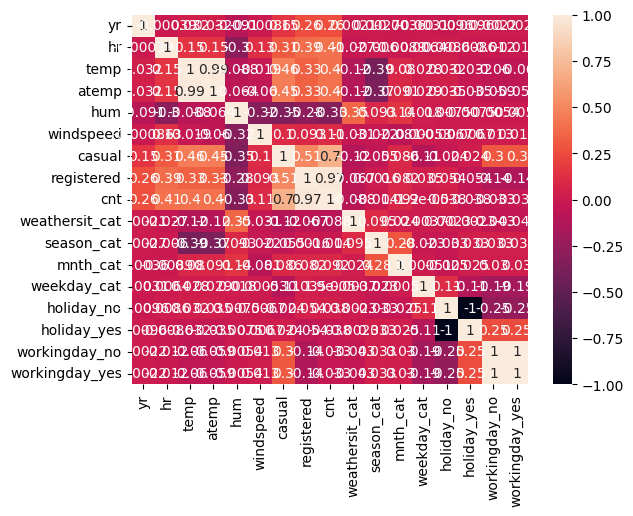

In [36]:
# Blaine's Code (with my version of encoding)
bike_df_final = pd.read_csv('BikeSharingDatasetFinal.csv', usecols=[3, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
corr_matrix = bike_df_final.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


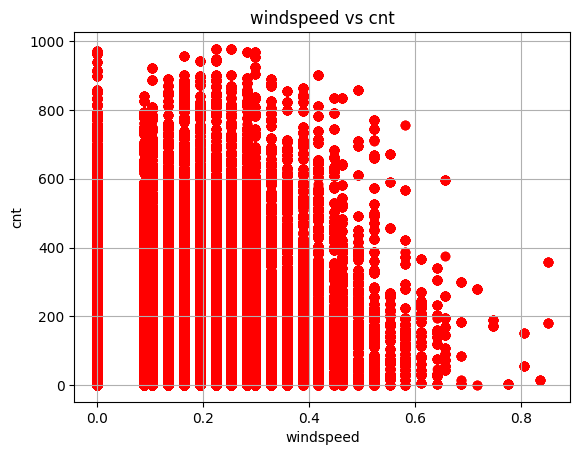

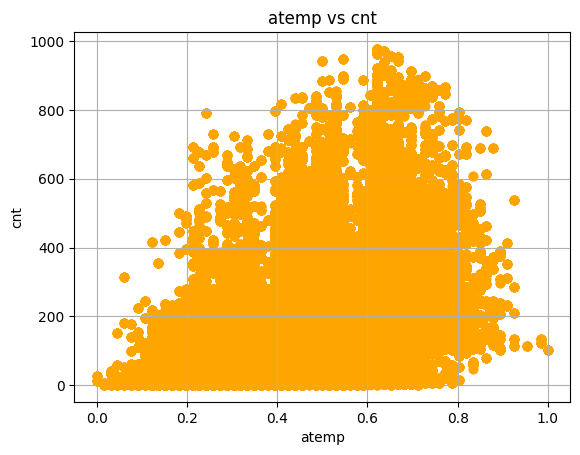

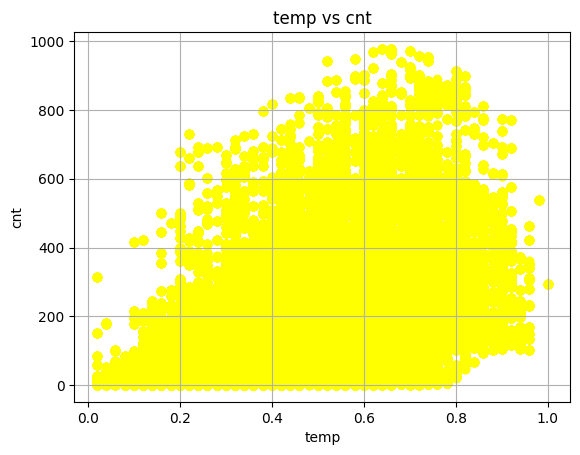

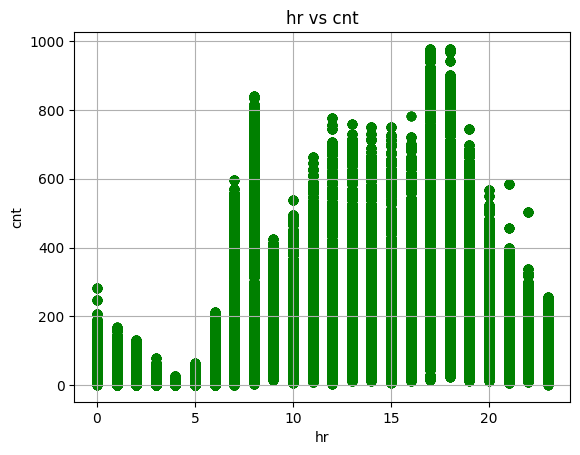

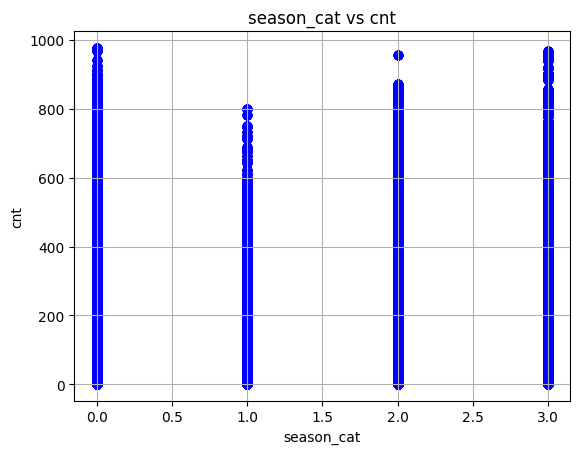

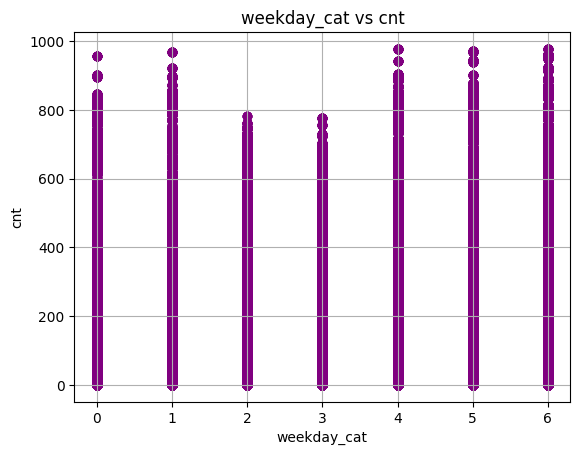

In [37]:
plt.scatter(bike_df_final['windspeed'], bike_df_final['cnt'], color='red')
plt.title('windspeed vs cnt')
plt.xlabel('windspeed')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike_df_final['atemp'], bike_df_final['cnt'], color='orange')
plt.title('atemp vs cnt')
plt.xlabel('atemp')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike_df_final['temp'], bike_df_final['cnt'], color='yellow')
plt.title('temp vs cnt')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike_df_final['hr'], bike_df_final['cnt'], color='green')
plt.title('hr vs cnt')
plt.xlabel('hr')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike_df_final['season_cat'], bike_df_final['cnt'], color='blue')
plt.title('season_cat vs cnt')
plt.xlabel('season_cat')
plt.ylabel('cnt')
plt.grid(True)
plt.show()

plt.scatter(bike_df_final['weekday_cat'], bike_df_final['cnt'], color='purple')
plt.title('weekday_cat vs cnt')
plt.xlabel('weekday_cat')
plt.ylabel('cnt')
plt.grid(True)
plt.show()


In [38]:
x = bike_df_final[['windspeed','hr','temp','season_cat','weekday_cat','workingday_yes', 'workingday_no', 'weathersit_cat']]
y = bike_df_final['cnt']

cv = KFold(n_splits=50, shuffle=True)

model = LinearRegression()

scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=-1)
mean(absolute(scores))

0.3107340087976676

In [39]:
x = bike_df_final[['windspeed','hr','temp','season_cat','weekday_cat','workingday_yes', 'workingday_no', 'weathersit_cat', 'casual']]
y = bike_df_final['cnt']

cv = KFold(n_splits=50, shuffle=True)

model = LinearRegression()

scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=-1)
mean(absolute(scores))

0.5868342578786254